[source](https://www.youtube.com/watch?v=wQ8BIBpya2k)

In [2]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [23]:
import matplotlib.pyplot as plt
import numpy as np

## Loading MNIST dataset

"tf.keras is TensorFlow's high-level API for building and training deep learning models... Keras has a simple, consistent interface optimized for common use cases. It provides clear and actionable feedback for user errors."

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

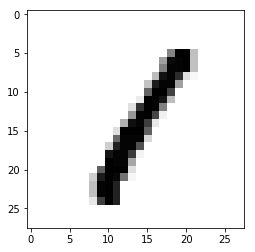

In [6]:
plt.imshow(x_train[3], cmap=plt.cm.binary)

In [7]:
x_train[0][20]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
       253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

Note that each element is a 2D array with 28x28 values from 0-263. Remember that it's best to normalize this data so that values are distributed roughly from -1 - 1, since this makes it easier for the network to learn (?). Luckily, there is a normalize function for this!

## Scaling/normalizing data

In [8]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

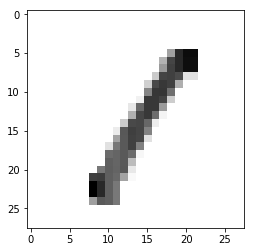

In [9]:
plt.imshow(x_train[3], cmap=plt.cm.binary)

In [10]:
x_train[0][20]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04117838, 0.16813739, 0.28960162, 0.32790981, 0.36833534,
       0.3689874 , 0.34978968, 0.25961929, 0.12760592, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

wow! now all the values are distributed from 0-1
## Building the model
The sequential model is the more common option

In [11]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# 128 'neurons' in the layer. 'activation' establishes what will
# cause the neurons to fire, in this case a 'rectified linear' function,
# which is the go-to function (start by always using this)
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
# next, add the last layer. it should have the same number of neurons
# as classifications. Use softmax for probability dist
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

## Define parameters for training the model

Pick
1. an optimizer (eg. gradient descent)
2. a loss calculation (?)
3. metrics you want to track

In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
# 'adam' is default go-to optimizer

## Train the model!

In [13]:
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 71us/sample - loss: 1.3080 - accuracy: 0.6426
Epoch 2/3
60000/60000 [==============================] - 4s 59us/sample - loss: 0.7316 - accuracy: 0.6881
Epoch 3/3
60000/60000 [==============================] - 4s 60us/sample - loss: 0.6067 - accuracy: 0.7048


now we see there is a 70% accuracy. neat! however, did the model overfit to our training data? let's find out

In [14]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

(0.612778320980072, 0.6984)


In [15]:
predictions = model.predict([x_test])

In [27]:
predictions[11]

array([0.01137756, 0.00571954, 0.00811382, 0.00502236, 0.00834146,
       0.02047961, 0.92314523, 0.00461624, 0.00932339, 0.00386089],
      dtype=float32)

In [28]:
np.argmax(predictions[11])

6

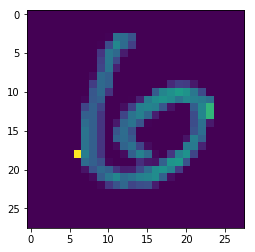

In [26]:
plt.imshow(x_test[11])

## TOLEARN:
- what are rectified linear and softmax?
- why is softmax 'good for probability distributions'
- what does it mean to flatten your layers (layers.Flatten)?
- what are Dense layers?
- what's the 'adam' optimizer?
- what is meant by calculating loss?
- what are the parameters passed to model.fit()?